In [54]:
# create data points
import numpy as np
import matplotlib.pyplot as plt

def huber(x: np.ndarray, delta, alpha=1.):
    return np.where(
        np.abs(x) <= delta, 
        alpha * .5 * x ** 2,
        alpha * delta * (np.abs(x) - .5 * delta),
    )

def l1(y: np.ndarray, gamma):
    return gamma * np.abs(y)

def f(x, y, delta, gamma, alpha=1.):
    return huber(x, delta, alpha) + l1(y, gamma)

In [62]:
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
# create grid
X, Y = np.meshgrid(x, y)
Z = f(X, Y, delta=3, gamma=0.2, alpha=2.)

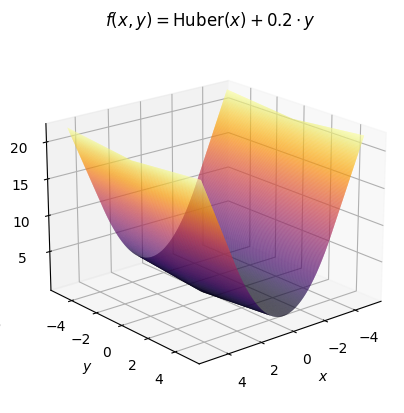

In [68]:
# create figure container
fig = plt.figure()
ax = plt.axes(projection='3d')
# 3d contour plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')
# set labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('Loss with low-rank gradients $f(x,y)$')
# set point of view, altitude and azimuthal axis
ax.view_init(20, 50)
plt.title("$f(x,y) = \\mathrm{Huber}(x) + 0.2 \\cdot y$")
# save figure
plt.savefig('3d_surface.png', dpi=300)